1. # MBTI Personality Classifier via Naive Bayes Classifier

This programme will classify people into mbti personality types based on their past 50 posts on social media using the basic naivebayesclassifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

### Importing the dataset 

In [4]:
data_set = pd.read_csv("../data/mbti_1_with_functions.csv")
data_set.tail()

,type,dom,aux,posts
8670,ISFP,Fi,Se,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,Ne,Fi,'So...if this thread already exists someplace ...
8672,INTP,Ti,Ne,'So many questions when i do these things. I ...
8673,INFP,Fi,Ne,'I am very conflicted right now when it comes ...
8674,INFP,Fi,Ne,'It has been too long since I have been on per...


### Checking the dataset for missing values

In [5]:
data_set.isnull().any()

type     False
dom      False
aux      False
posts    False
dtype: bool

## Exploring the dataset

The size of the dataset

In [6]:
data_set.shape

(8675, 4)

Explroing the posts in posts field

In [7]:
data_set.iloc[0,3].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

Finding the number of posts

In [8]:
len(data_set.iloc[1,3].split('|||'))

50

Finding the unique vales from type of personality column

In [9]:
types = np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [10]:
functions = np.unique(np.array(data_set['dom']))

Graphing it for better visualization

Text(0.5, 1.0, 'Total posts for each personality type')

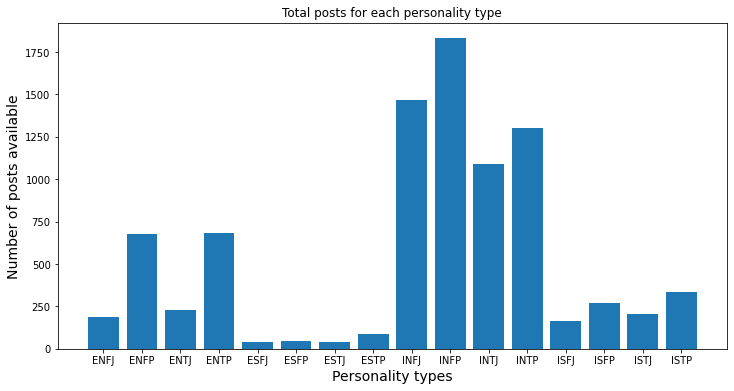

In [11]:
total = data_set.groupby(['type']).count()
plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

Text(0.5, 1.0, 'Total posts for each dom function')

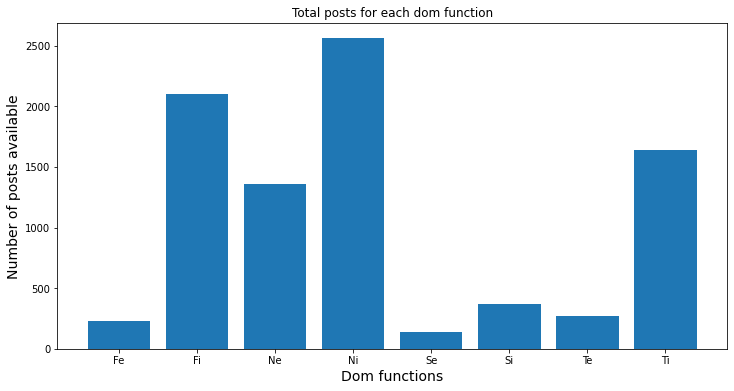

In [12]:

total = data_set.groupby(['dom']).count()

plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Dom functions', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each dom function')

Text(0.5, 1.0, 'Total posts for each aux function')

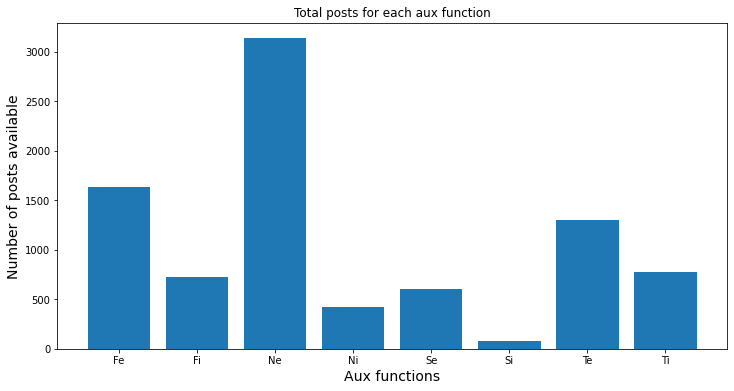

In [13]:
total = data_set.groupby(['aux']).count()
plt.figure(figsize = (12,6))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Aux functions', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each aux function')

## Organising the data to create a bag words model

Segrating all the posts by their personality types and ***creating a new dataframe to store all this in***

In [14]:
type_to_posts = pd.DataFrame()
for j in types:
    temp1 = data_set[data_set['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    type_to_posts[j] = temp3

# build main
main_to_posts = pd.DataFrame()
dom_to_posts = pd.DataFrame()
aux_to_posts = pd.DataFrame()
for j in functions:
    domsRaw = data_set[data_set['dom']==j]['posts']
    auxsRaw = data_set[data_set['aux']==j]['posts']
    main = []
    doms = []
    auxs = []
    for i in domsRaw:
        splitted = i.split('|||')
        main+=splitted
        doms+=splitted
    for i in auxsRaw:
        splitted = i.split('|||')
        main+=splitted
        auxs+=splitted
        
    mainSeries = pd.Series(main)
    main_to_posts[j] = mainSeries
    
    domsSeries = pd.Series(doms)
    dom_to_posts[j] = domsSeries
    
    auxsSeries = pd.Series(auxs)
    aux_to_posts[j] = auxsSeries

In [15]:
main_to_posts.tail()

,Fe,Fi,Ne,Ni,Se,Si,Te,Ti
91527,"Oh, is that what they call it these days? :ton...",I'm not a hipster or a hippie. I'm me and as c...,Can't decide to start you motherfuckers bid's ...,Got 3 hours of sleep and I have a bit of a spl...,NaN,NaN,NaN,I made this into an automated test that you ca...
91528,I don't know whether or not you're including m...,'The only one I kept stuff for was my boyfrien...,I don't mind casual sex. My fantasies changes ...,I am going to raid the sh*t out of that cookie...,NaN,NaN,NaN,"If you relate strongly to both functions, that..."
91529,"Too late, I'm already on a drug. It's called....",I definitely feel that way. I feel disliked by...,I'm not afraid I disobeyed and stayed away fr...,Fire. Speed or Power?,NaN,NaN,NaN,You chose the Ne and Si answer instead of the ...
91530,"Speaking of 'dirtius thougticus lobes,' didn't...",I couldn't travel alone. I have to share my ex...,Do I have a silly switch? no................I ...,^ ENTP https://www.youtube.com/watch?v=5Xu0F...,NaN,NaN,NaN,Praimfaya & Marshy14 I made this into an au...
91531,Perhaps the better question is: how are we not...,Out of respect I sit and listen and try to gen...,people say I have numerous talents...so I gues...,I don't even know why I'm sharing this. http...,NaN,NaN,NaN,"I agree with you, but for the sake of testing ..."


### Creating a function to tokenize the words

In [16]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

A random check of the function

In [17]:
build_bag_of_words_features_filtered(main_to_posts['Ti'].iloc[1])

{'Of': 1,
 'course': 1,
 'I': 1,
 'say': 1,
 'know': 1,
 "'s": 1,
 'blessing': 1,
 'curse': 1}

## Creating a classifyer for Main functions

In [18]:
features=[]
for j in functions:
    key = j
    temp1 = main_to_posts[key]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), key) for i in temp1]]    

In [19]:
split=[]
for i in range(8):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [20]:

train=[]
for i in range(8):
    train += features[i][:split[i]] 

In [21]:
MainFunction = NaiveBayesClassifier.train(train)

In [22]:
nltk.classify.util.accuracy(MainFunction, train)*100

41.02282216889885

In [23]:
test=[]
for i in range(8):
    test += features[i][split[i]:]

In [24]:
nltk.classify.util.accuracy(MainFunction, test)*100

15.770024353943986

## Creating a classifyer for Dominating functions

In [25]:
# Features for the bag of words model
features=[]
for j in functions:
    key = j
    temp1 = dom_to_posts[key]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), key) for i in temp1]]    

In [26]:
split=[]
for i in range(8):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [27]:

train=[]
for i in range(8):
    train += features[i][:split[i]] 

In [28]:
DomFunction = NaiveBayesClassifier.train(train)

In [29]:
nltk.classify.util.accuracy(DomFunction, train)*100

66.03013902463931

In [30]:
test=[]
for i in range(8):
    test += features[i][split[i]:]

In [31]:
nltk.classify.util.accuracy(DomFunction, test)*100

20.886555847185768

## Creating a classifyer for Auxilary functions

In [32]:
# Features for the bag of words model
features=[]
for j in functions:
    key = j
    temp1 = aux_to_posts[key]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), key) for i in temp1]]    

In [33]:
split=[]
for i in range(8):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [34]:

train=[]
for i in range(8):
    train += features[i][:split[i]] 

In [35]:
AuxFunction = NaiveBayesClassifier.train(train)

In [36]:
nltk.classify.util.accuracy(AuxFunction, train)*100

39.15171347020137

In [37]:
test=[]
for i in range(8):
    test += features[i][split[i]:]

In [38]:
nltk.classify.util.accuracy(AuxFunction, test)*100

21.386828982525326

## Creating a classifyer for Introversion (I) and Extroversion (E)

**Note:** The details for the steps over here are same as the ones while creating the model above, hence I will only explain the changes

In [39]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = type_to_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [40]:
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

Data for training

In [41]:

train=[]
for i in range(16):
    train += features[i][:split[i]] 

Training the model

In [42]:
IntroExtro = NaiveBayesClassifier.train(train)

Testing the model on the dataset it was trained for accuracy

In [43]:
nltk.classify.util.accuracy(IntroExtro, train)*100

80.76425473777905

Creating the test data

In [44]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Testing the model on the test dataset which it has never seen before

In [45]:
nltk.classify.util.accuracy(IntroExtro, test)*100

58.109506269916814

Seeing that this model has good somewhat good results, I shall repeat the same with the rest of the traits

## Creating a classifyer for Intuition (N) and Sensing (S)

In [46]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = type_to_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

Data for training

In [47]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Training the model

In [48]:
IntuitionSensing = NaiveBayesClassifier.train(train)

Testing the model on the dataset it was trained for accuracy

In [49]:
nltk.classify.util.accuracy(IntuitionSensing, train)*100

70.01473096604126

Creating the test data

In [50]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Testing the model on the test dataset which it has never seen before

In [51]:
nltk.classify.util.accuracy(IntuitionSensing, test)*100

54.43569200386005

## Creating a classifyer for Thinking (T) and Feeling (F)

In [52]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = type_to_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

Data for training

In [53]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Training the model

In [54]:
ThinkingFeeling = NaiveBayesClassifier.train(train)

Testing the model on the dataset it was trained for accuracy

In [55]:
nltk.classify.util.accuracy(ThinkingFeeling, train)*100

79.64229897430059

Creating the test data

In [56]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Testing the model on the test dataset which it has never seen before

In [57]:
nltk.classify.util.accuracy(ThinkingFeeling, test)*100

59.48764640152299

## Creating a classifyer for Judging (J) and Percieving (P)

In [58]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = type_to_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

Data for training

In [59]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Training the model

In [60]:
JudgingPercieiving = NaiveBayesClassifier.train(train)

Testing the model on the dataset it was trained for accuracy

In [61]:
nltk.classify.util.accuracy(JudgingPercieiving, train)*100

79.38251032427006

Creating the test data

In [62]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Testing the model on the test dataset which it has never seen before

In [63]:
nltk.classify.util.accuracy(JudgingPercieiving, test)*100

54.372387534660426

# Summarizing the results of the models
***


In [64]:
temp = {'train' : [81.12443979837917,70.14524215640667,80.03456948570128,79.79341109742592], 'test' : [58.20469312585358,54.46262259027357,59.41315234035509,54.40549600629061]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
train,81.124440,70.145242,80.034569,79.793411
test,58.204693,54.462623,59.413152,54.405496


Plotting the results for better appeal

Text(0.5, 1.0, 'Total posts for each personality type')

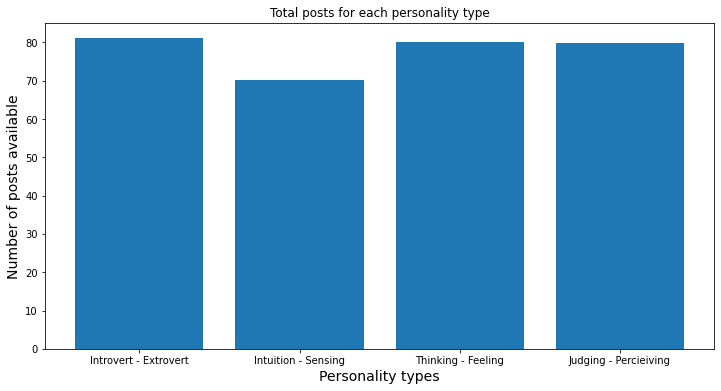

In [65]:
plt.figure(figsize = (12,6))

plt.bar(np.array(results.columns), height = results.loc['train'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

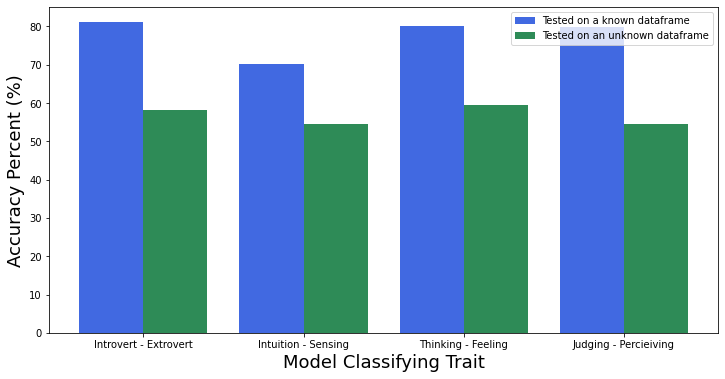

In [66]:
labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='royalblue')

testing = results.loc['test']
rects2 = ax.bar(ind+width, testing, width, color='seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Model Classifying Trait', size = 18)
ax.set_ylabel('Accuracy Percent (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Tested on a known dataframe', 'Tested on an unknown dataframe'))
plt.show()

# Save trained models

In [76]:
import pickle
import os

def save_classifier(classifier, name):
    f = open(os.path.join('models', name+'.pickle'), 'wb')
    pickle.dump(classifier, f)
    f.close()
         
save_classifier(IntroExtro, "IntroExtro")
save_classifier(IntuitionSensing, "IntuitionSensing")
save_classifier(ThinkingFeeling, "ThinkingFeeling")
save_classifier(JudgingPercieiving, "JudgingPercieiving")
save_classifier(MainFunction, "MainFunction")
save_classifier(DomFunction, "DomFunction")
save_classifier(AuxFunction, "AuxFunction")

Now you can use trained model to predict the type using `predict.ipynb` notebook.